# 1 The objective of this notebook is to train and test a baseline model - Logistic Regression


We only want to focus on the dissatisfied clients, so we can identify the problems here. So, we will aim for the metric that cares about the negatives outcomes 0.
For this, we will focus on the specificity.

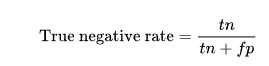


Reference metric: 73%

In [1]:
#---------Importing libraries---------#

#---Data analysis---#
import pandas as pd
import numpy as np


#---Data splitting---#
from sklearn.model_selection import train_test_split
#cross validation
from sklearn.model_selection import cross_val_score

#---classification models---#
from sklearn.linear_model import LogisticRegression

#---evaluation---#
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

#---visualization---#
import matplotlib.pyplot as plt

#---utils---#
import os


In [2]:
def specificity_score(y_test, y_pred, file_name):
    '''Info:
    Specificity score is the proportion of negative cases that were correctly identified.
    It is calculated as: TN / (TN + FP)
    ------------------------------------------------------------------------------------
    Input:
    y_test: true labels
    y_pred: predicted labels
    ------------------------------------------------------------------------------------
    Output:
    specificity score
    ------------------------------------------------------------------------------------
    '''

    # Replace None values with a default value (e.g., -1)
    y_test = np.where(y_test is None, -1, y_test)
    y_pred = np.where(y_pred is None, -1, y_pred)
    tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp + 1e-8)
    print('Specificity score: {:.2%} '.format(specificity))
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
    plt.title('Confusion matrix for {}'.format(file_name))
  






In [3]:
#function that receives the dataset, and the model and returns the accuracy and specificity scores

def model_evaluation(patch, model):
    '''Info:
    This function receives the dataset and the model and returns the accuracy and specificity scores
    -----------------------------------------------------------------------------------------------
    Input:
    patch: the path of the dataset
    model: the model to be used
    -----------------------------------------------------------------------------------------------
    Output:
    accuracy_score: the accuracy score
    specificity_score: the specificity score
    -----------------------------------------------------------------------------------------------
    '''
    df = pd.read_csv(patch)
    #print final part of the path ( everything after the last /)
    file_name = patch.split("/")[-1]
    print(f'\nThe path of the dataset is: {file_name}')
    #print the shape of the dataset
    print('The shape of the dataset is: {}'.format(df.shape))
    X = df.drop(columns=['Y'])
    y = df['Y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy score: {:.2%} '.format(accuracy_score(y_test, y_pred)))
    print('AUC ROC score: {:.2%} '.format(roc_auc_score(y_test, y_pred)))
    specificity_score(y_test, y_pred, file_name)
   

In [4]:
#baseline model
model = LogisticRegression(random_state=42)

## 1.1 Raw data


The path of the dataset is: ACME-HappinessSurvey2020.csv
The shape of the dataset is: (126, 7)
Accuracy score: 46.15% 
AUC ROC score: 48.48% 
Specificity score: 33.33% 


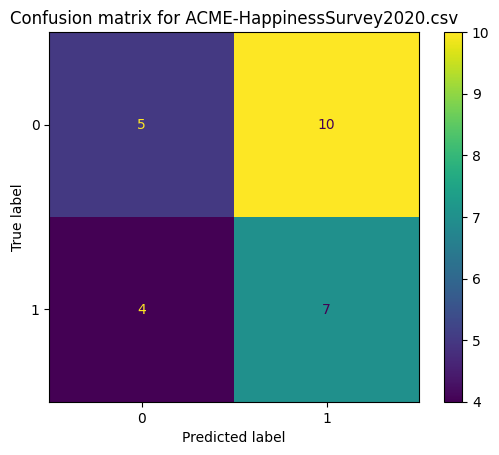

In [5]:
#importing raw data
patch = 'data/ACME-HappinessSurvey2020.csv'

#calling the function
model_evaluation(patch, model)


Okay, our baseline is 46% accuracy, auc of 48.48 and specificity 33%. Let's see if we can do better.

## 1.2 Data version 1

Data with rows of that with the majority in the gaussian curve


The path of the dataset is: base_v1.csv
The shape of the dataset is: (109, 7)
Accuracy score: 72.73% 
AUC ROC score: 70.83% 
Specificity score: 50.00% 


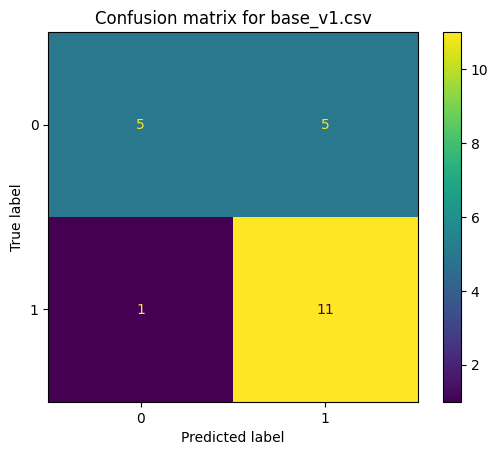

In [6]:
#importing data
patch = 'data/base_v1.csv'

#calling the function
model_evaluation(patch, model)

72.7% ! almost a 30% improvement over the baseline. Good AUC ROC too with 70%. Altough, the specificity is only 50%. 

## 1.3 Data version 2


The path of the dataset is: base_v2.csv
The shape of the dataset is: (109, 5)
Accuracy score: 63.64% 
AUC ROC score: 63.33% 
Specificity score: 60.00% 


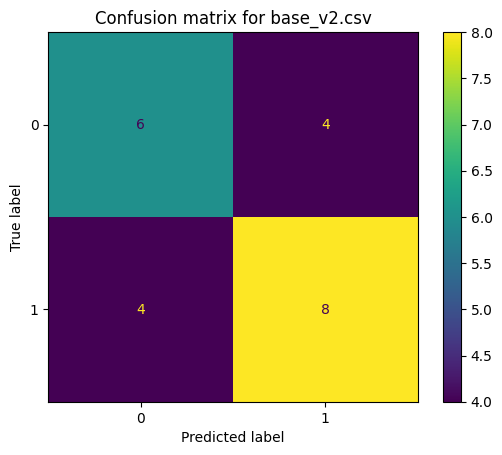

In [7]:
#importing data
patch = 'data/base_v2.csv'

#calling the function
model_evaluation(patch, model)

Worse accuracy (63%) and AUC ROC (60%) but better specificity (60%)!

## 1.3 Data version 3


The path of the dataset is: base_v3.csv
The shape of the dataset is: (109, 7)
Accuracy score: 54.55% 
AUC ROC score: 52.50% 
Specificity score: 30.00% 


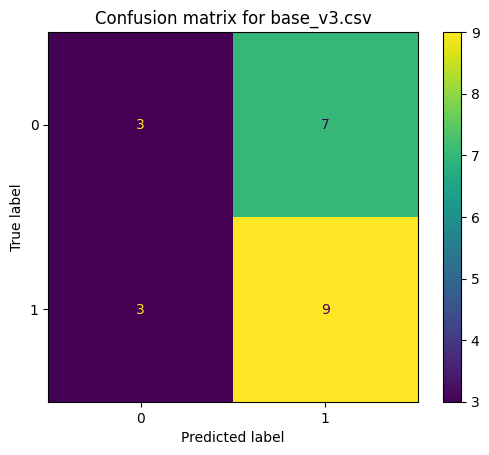

In [8]:
#importing data
patch = 'data/base_v3.csv'

#calling the function
model_evaluation(patch, model)

## 1.4 Data version 4


The path of the dataset is: base_v4.csv
The shape of the dataset is: (109, 6)
Accuracy score: 68.18% 
AUC ROC score: 67.50% 
Specificity score: 60.00% 


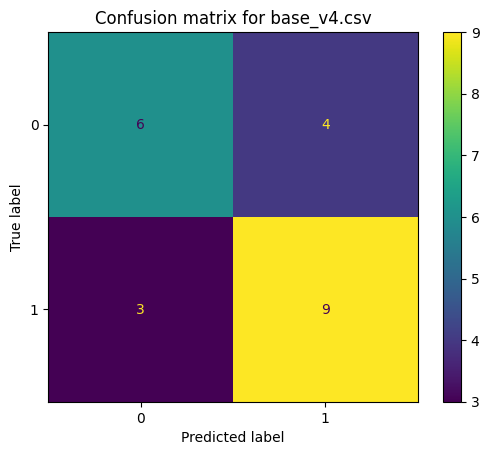

In [9]:
#importing data
patch = 'data/base_v4.csv'

#calling the function
model_evaluation(patch, model)

## 1.5 Data version 5


The path of the dataset is: base_v5.csv
The shape of the dataset is: (109, 6)
Accuracy score: 68.18% 
AUC ROC score: 66.67% 
Specificity score: 50.00% 


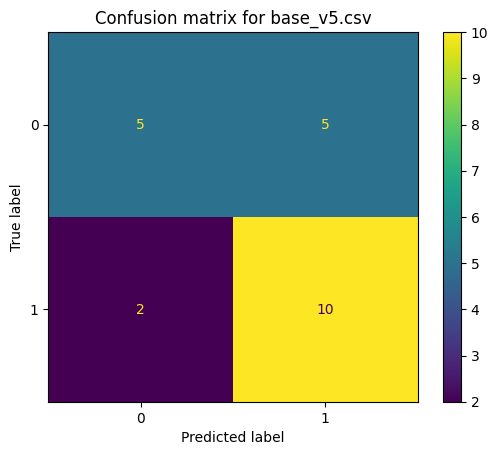

In [10]:
#importing data
patch = 'data/base_v5.csv'

#calling the function
model_evaluation(patch, model)

## 1.5 Data version 6 - Getting rid of one feature at a time

In [11]:
dfs = []
for i in range(1,7):
    dfs.append('data/base_v6_X{}.csv'.format(i))


The path of the dataset is: base_v6_X1.csv
The shape of the dataset is: (109, 6)
Accuracy score: 63.64% 
AUC ROC score: 61.67% 
Specificity score: 40.00% 

The path of the dataset is: base_v6_X2.csv
The shape of the dataset is: (109, 6)
Accuracy score: 68.18% 
AUC ROC score: 67.50% 
Specificity score: 60.00% 

The path of the dataset is: base_v6_X3.csv
The shape of the dataset is: (109, 6)
Accuracy score: 68.18% 
AUC ROC score: 66.67% 
Specificity score: 50.00% 

The path of the dataset is: base_v6_X4.csv
The shape of the dataset is: (109, 6)
Accuracy score: 72.73% 
AUC ROC score: 71.67% 
Specificity score: 60.00% 

The path of the dataset is: base_v6_X5.csv
The shape of the dataset is: (109, 6)
Accuracy score: 68.18% 
AUC ROC score: 67.50% 
Specificity score: 60.00% 

The path of the dataset is: base_v6_X6.csv
The shape of the dataset is: (109, 6)
Accuracy score: 68.18% 
AUC ROC score: 65.83% 
Specificity score: 40.00% 


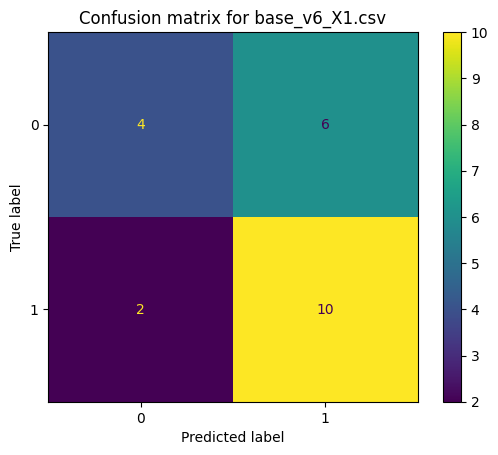

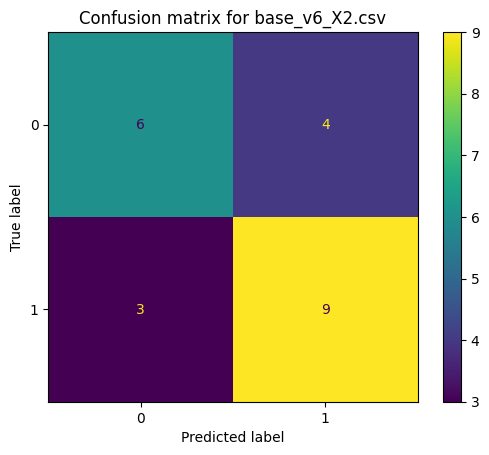

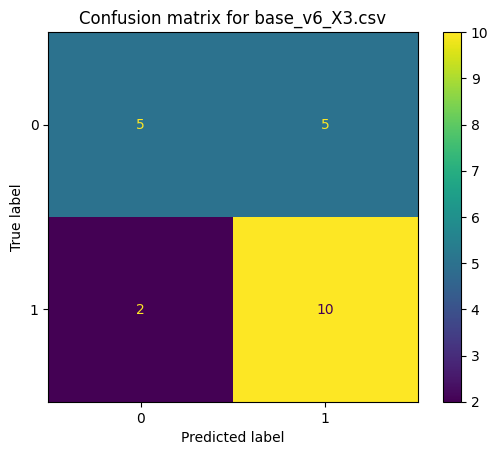

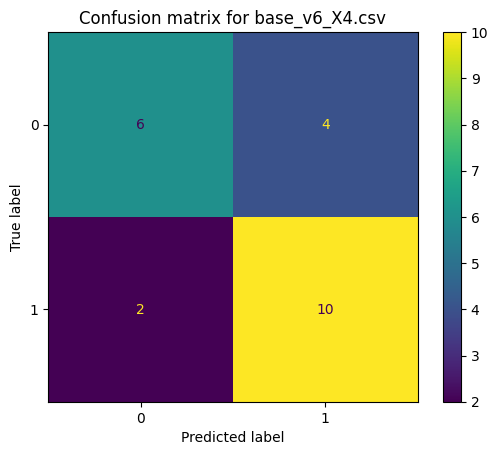

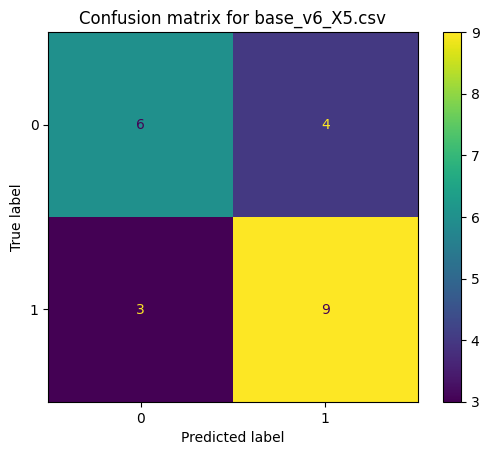

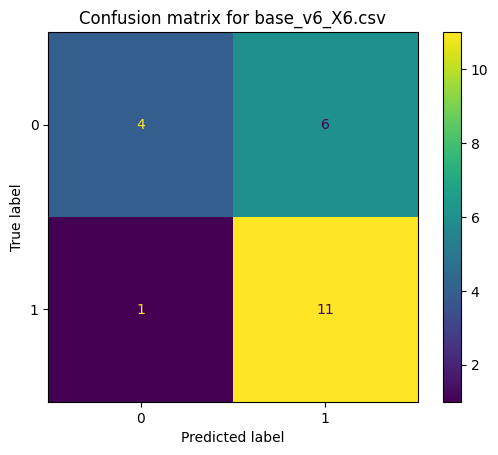

In [12]:
for patch in dfs:
    model_evaluation(patch, model)
    


As we could see, the model performs the best when we get rid of the X4 column, which means X4 = I paid a good price for my order. Which make sense, as people tend to pay anyways for the price they think its fair. So, they are likely to buy only things that the price is fair.

## 1.6.2 Data version 6.2 - Getting rid of  2 features

In [13]:


dfs = []
range_1 = [1,2,3,5,6] # no 4 feature
for i in range_1:
    dfs.append('data/base_v6_X4_X{}.csv'.format(i))


The path of the dataset is: base_v6_X4_X1.csv
The shape of the dataset is: (109, 5)
Accuracy score: 63.64% 
AUC ROC score: 61.67% 
Specificity score: 40.00% 

The path of the dataset is: base_v6_X4_X2.csv
The shape of the dataset is: (109, 5)
Accuracy score: 63.64% 
AUC ROC score: 63.33% 
Specificity score: 60.00% 

The path of the dataset is: base_v6_X4_X3.csv
The shape of the dataset is: (109, 5)
Accuracy score: 68.18% 
AUC ROC score: 66.67% 
Specificity score: 50.00% 

The path of the dataset is: base_v6_X4_X5.csv
The shape of the dataset is: (109, 5)
Accuracy score: 68.18% 
AUC ROC score: 67.50% 
Specificity score: 60.00% 

The path of the dataset is: base_v6_X4_X6.csv
The shape of the dataset is: (109, 5)
Accuracy score: 68.18% 
AUC ROC score: 65.83% 
Specificity score: 40.00% 


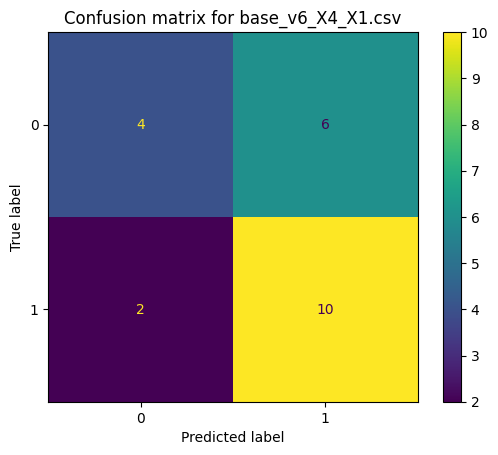

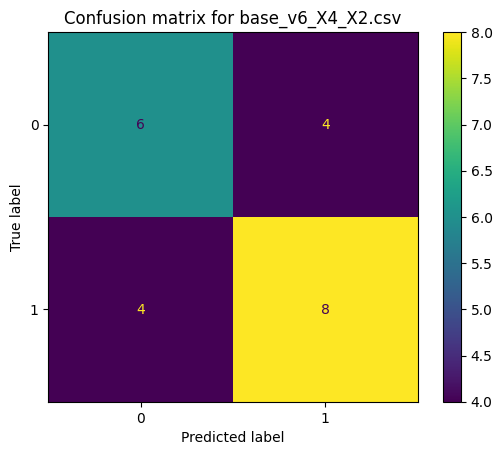

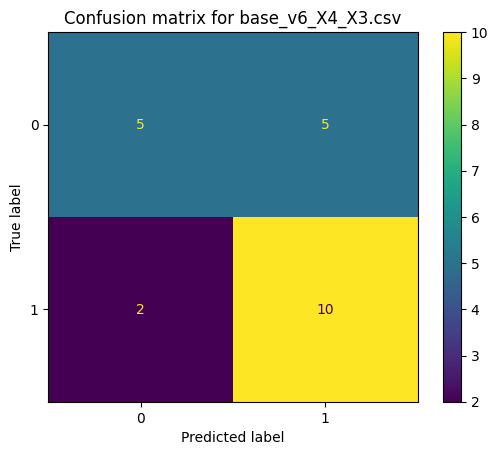

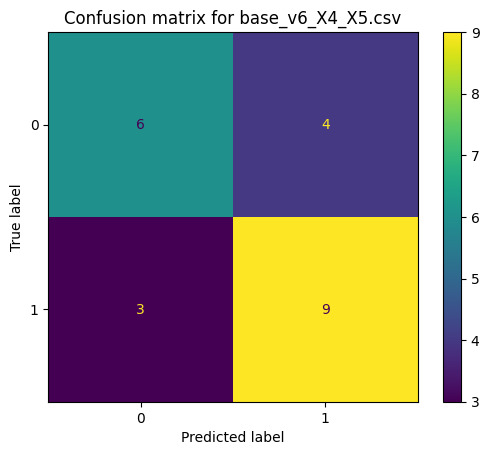

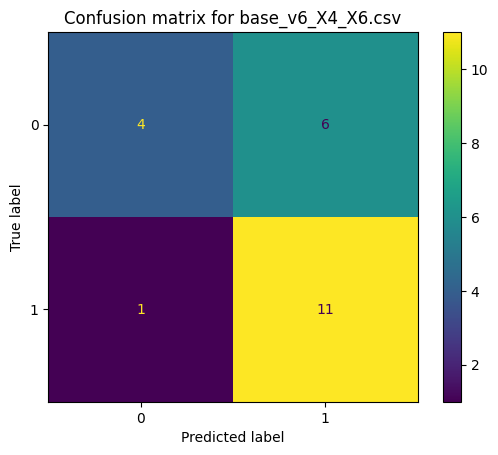

In [15]:
for patch in dfs:
    model_evaluation(patch, model)

## 1.7 Data version & combination of v5 and v6


The path of the dataset is: base_v7.csv
The shape of the dataset is: (109, 5)
Accuracy score: 68.18% 
AUC ROC score: 66.67% 
Specificity score: 50.00% 


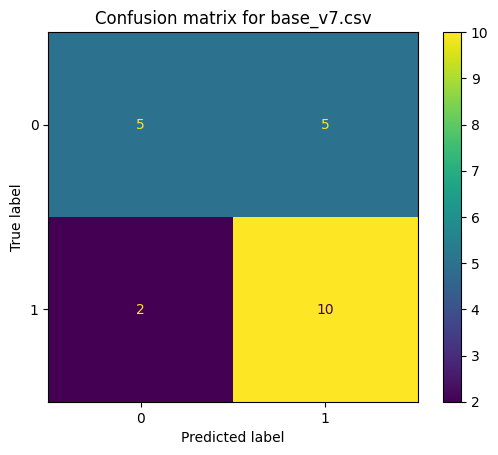

In [14]:
patch = 'data/base_v7.csv'

#calling the function
model_evaluation(patch, model)

# Conclusion

The best score was achieved with data 'base_v6_X4.csv' with:
* Accuracy score: 72.73% 
* AUC ROC score: 71.67% 
* Specificity score: 60.00% 